<a href="https://colab.research.google.com/github/minhnguyen10/CarPricePredictionFinal/blob/master/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install -U scikit-learn


Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


In [0]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_log_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

In [16]:
#Importing the dataset
dataset = pd.read_csv('data.csv')
#Getting information
print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB
None
  Make       Model  Year  ... city mpg  Popularity   MSRP
0  BMW  1 Series M  2011  ...       19        3916  46135
1  BMW    1 Series  201

In [17]:
dataset_new = dataset

#New dataset without Market Category Feature
dataset_new = dataset_new.drop(['Market Category'],axis = 1)
dataset_new = dataset_new.drop(['Model'],axis = 1)

#Drop rows with null values
dataset_new = dataset_new.dropna(axis='rows')
dataset_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11812 entries, 0 to 11913
Data columns (total 14 columns):
Make                 11812 non-null object
Year                 11812 non-null int64
Engine Fuel Type     11812 non-null object
Engine HP            11812 non-null float64
Engine Cylinders     11812 non-null float64
Transmission Type    11812 non-null object
Driven_Wheels        11812 non-null object
Number of Doors      11812 non-null float64
Vehicle Size         11812 non-null object
Vehicle Style        11812 non-null object
highway MPG          11812 non-null int64
city mpg             11812 non-null int64
Popularity           11812 non-null int64
MSRP                 11812 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.4+ MB


In [0]:
#ADDING NEW FEATURE AGE 
dataset_new['age'] = 2019 - dataset_new['Year']
dataset_new.drop(['Year'],axis=1,inplace=True)
dataset_new.head()

#ADDING NEW FEATURE Fuel economy
dataset_new['fueleconomy'] = (0.55 * dataset_new['city mpg']) + (0.45 * dataset_new['highway MPG'])

In [0]:
categorical_cols = ['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
labelencoder = LabelEncoder()

In [20]:
dataset_new[categorical_cols] = dataset_new[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))
z = np.abs(stats.zscore(dataset_new))
print(z)

threshold = 3
print(np.where(z > 3))

#Then, we create a new dataset which contains all the elements which is less than 3
new_dataset_df_o = dataset_new[(z < 3).all(axis=1)]

[[1.32871769e+00 8.20496139e-02 7.82909277e-01 ... 9.24837145e-02
  8.40652087e-02 4.87166751e-02]
 [1.32871769e+00 8.20496139e-02 4.62403279e-01 ... 1.49406628e-03
  8.40652087e-02 8.62314663e-02]
 [1.32871769e+00 8.20496139e-02 4.62403279e-01 ... 6.98378366e-02
  8.40652087e-02 1.68699775e-01]
 ...
 [1.60806685e+00 8.20496139e-02 4.62403279e-01 ... 1.66884548e-01
  2.15742472e-01 4.98543813e-01]
 [1.60806685e+00 7.55084364e-01 4.62403279e-01 ... 1.71861192e-01
  3.47419736e-01 4.98543813e-01]
 [1.37865384e-01 5.90985136e-01 2.61024544e-01 ... 1.91848568e-01
  5.74321109e-01 2.13653292e-01]]
(array([  135,   140,   142, ..., 11409, 11415, 11419]), array([1, 1, 1, ..., 1, 1, 1]))


In [0]:
X_dataset = new_dataset_df_o.drop('MSRP', axis = 1)
y_dataset = new_dataset_df_o['MSRP']

In [0]:
X_dataset = pd.get_dummies(X_dataset, dummy_na = False, columns=categorical_cols )

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.3, random_state = 0)

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

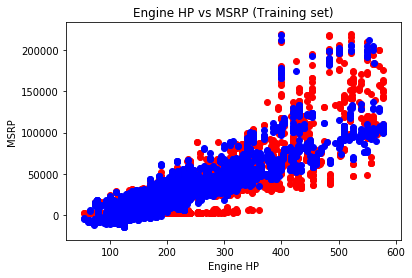

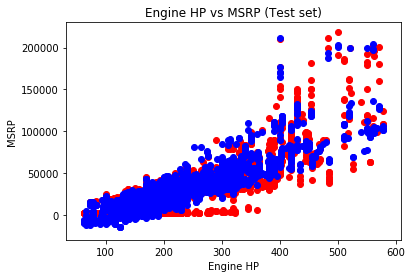

Error Training Set of Linear Regression Model 0.8671674974339089
Error Test Set of Linear Regression Model 0.8632718966500017


In [25]:
#Lineaer Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_train_linear = regressor.predict(X_train)
# Predicting the Test set results
y_pred_test_linear = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train['Engine HP'], y_train, color = 'red')
plt.scatter(X_train['Engine HP'], regressor.predict(X_train), color = 'blue')
plt.title('Engine HP vs MSRP (Training set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

# Visualising the Test set results
plt.scatter(X_test['Engine HP'], y_test, color = 'red')
plt.scatter(X_test['Engine HP'], regressor.predict(X_test), color = 'blue')
plt.title('Engine HP vs MSRP (Test set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()
print("Error Training Set of Linear Regression Model", performance_metric(y_train,y_pred_train_linear))
print("Error Test Set of Linear Regression Model", performance_metric(y_test,y_pred_test_linear))

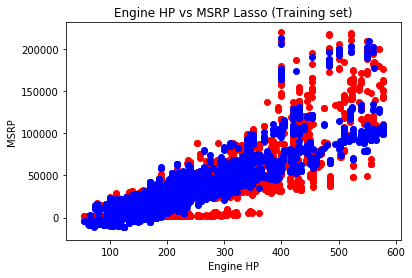

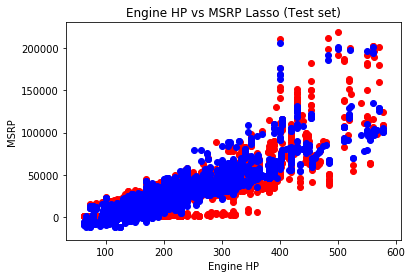

Error Training Set of Lasso Linear Regression Model 0.8657164182895436
Error Test Set of Lasso Linear Regression Model 0.8625857645838956


In [26]:
# Lasso Regression
from sklearn.linear_model import Lasso

#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True, max_iter=1e5 )

#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)

# Visualising the Training set results
plt.scatter(X_train['Engine HP'], y_train, color = 'red')
plt.scatter(X_train['Engine HP'], lasso_reg.predict(X_train), color = 'blue')
plt.title('Engine HP vs MSRP Lasso (Training set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

# Visualising the Test set results
plt.scatter(X_test['Engine HP'], y_test, color = 'red')
plt.scatter(X_test['Engine HP'], lasso_reg.predict(X_test), color = 'blue')
plt.title('Engine HP vs MSRP Lasso (Test set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

#Predicting for X_test
y_pred_lass_train =lasso_reg.predict(X_train)
y_pred_lass_test =lasso_reg.predict(X_test)
print("Error Training Set of Lasso Linear Regression Model", performance_metric(y_train,y_pred_lass_train))
print("Error Test Set of Lasso Linear Regression Model", performance_metric(y_test,y_pred_lass_test))

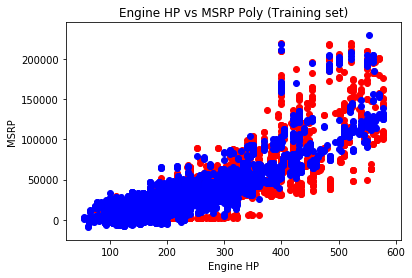

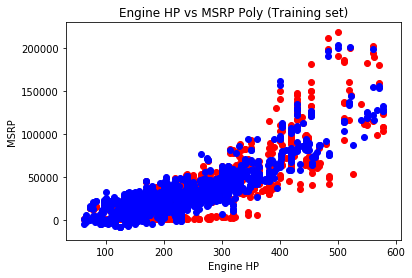

Error Training Set of Polynomial Regression Model 0.8948105674556465
Error Test Set of Polynomial Regression Model 0.8984050843257939


In [28]:
#Poly Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = X_dataset.values
y = y_dataset.values

#Engine HP
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X[:,0].reshape(-1, 1))
X = np.append(X ,X_poly[:,2:3],1)

#high mpg
X_poly_hm = poly_reg.fit_transform(X[:,3].reshape(-1, 1))
X = np.append(X ,X_poly_hm[:,2:3],1)

#city mpg
X_poly_cm = poly_reg.fit_transform(X[:,4].reshape(-1, 1))
X = np.append(X ,X_poly_cm[:,2:3],1)

#fuel
X_poly_fc = poly_reg.fit_transform(X[:,7].reshape(-1, 1))
X = np.append(X ,X_poly_fc[:,2:3],1)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X, y, test_size=0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train_poly)

y_pred_train_poly = regressor.predict(X_train_poly)
# Predicting the Test set results
y_pred_test_poly = regressor.predict(X_test_poly)

# Visualising the Training set results
plt.scatter(X_train_poly[:,0], y_train_poly, color = 'red')
plt.scatter(X_train_poly[:,0], regressor.predict(X_train_poly), color = 'blue')
plt.title('Engine HP vs MSRP Poly (Training set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

# Visualising the Test set results
plt.scatter(X_test_poly[:,0], y_test_poly, color = 'red')
plt.scatter(X_test_poly[:,0], regressor.predict(X_test_poly), color = 'blue')
plt.title('Engine HP vs MSRP Poly (Training set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()
print("Error Training Set of Polynomial Regression Model", performance_metric(y_train_poly,y_pred_train_poly))
print("Error Test Set of Polynomial Regression Model", performance_metric(y_test_poly,y_pred_test_poly))

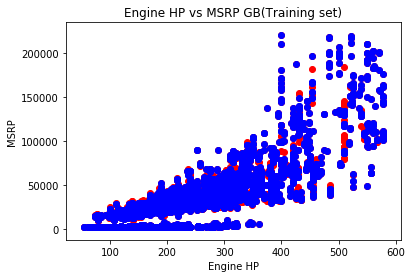

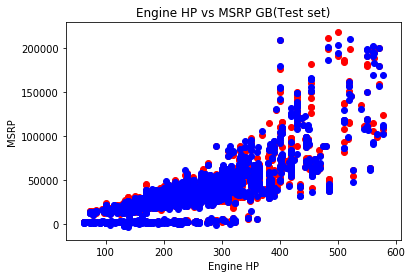

Error Training Set of Gradient Boosting Regression Model 0.9922671138489647
Error Test Set of Gradient Boosting Regression Model 0.9603355948988034


In [29]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor

gbrt = GradientBoostingRegressor(max_depth=10, n_estimators=100, learning_rate=1.0, random_state=0)
gbrt.fit(X_train, y_train.values.ravel())
y_pred_train_gradient = gbrt.predict(X_train)
y_pred_test_gradient = gbrt.predict(X_test)
# Visualising the Training set results
plt.scatter(X_train['Engine HP'], y_train, color = 'red')
plt.scatter(X_train['Engine HP'], gbrt.predict(X_train), color = 'blue')
plt.title('Engine HP vs MSRP GB(Training set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

# Visualising the Test set results
plt.scatter(X_test['Engine HP'], y_test, color = 'red')
plt.scatter(X_test['Engine HP'], gbrt.predict(X_test), color = 'blue')
plt.title('Engine HP vs MSRP GB(Test set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()
print("Error Training Set of Gradient Boosting Regression Model", performance_metric(y_train,y_pred_train_gradient))
print("Error Test Set of Gradient Boosting Regression Model", performance_metric(y_test,y_pred_test_gradient))

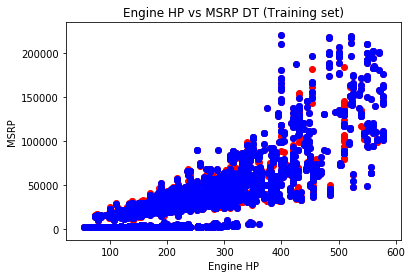

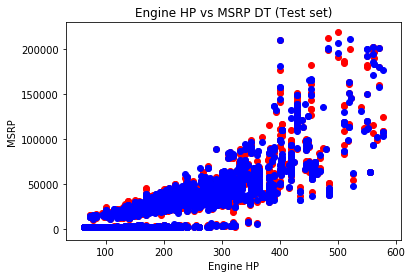

Error Training Set of Decision Tree Model 0.9922671138866426
Error Test Set of Decision Tree Model 0.954272010133932


In [30]:
# Decision Tree
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_d_tree = DecisionTreeRegressor()
regressor_d_tree.fit(X_train, y_train)

y_pred_train_d_tree = regressor_d_tree.predict(X_train)
# Predicting the Test set results
y_pred_test_d_tree = regressor_d_tree.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train['Engine HP'], y_train, color = 'red')
plt.scatter(X_train['Engine HP'], regressor_d_tree.predict(X_train), color = 'blue')
plt.title('Engine HP vs MSRP DT (Training set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()
# Visualising the Test set results
plt.scatter(X_test['Engine HP'], y_test, color = 'red')
plt.scatter(X_test['Engine HP'], regressor_d_tree.predict(X_test), color = 'blue')
plt.title('Engine HP vs MSRP DT (Test set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()
print("Error Training Set of Decision Tree Model", performance_metric(y_train,y_pred_train_d_tree))
print("Error Test Set of Decision Tree Model", performance_metric(y_test,y_pred_test_d_tree))

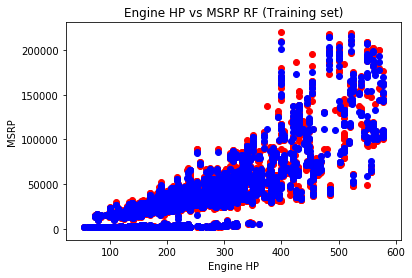

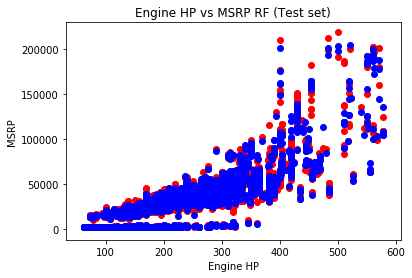

Error Training Set of Random Forest Model 0.9898718423176354
Error Test Set of Random Forest Model 0.9697743867845878


In [31]:
#Random Forest Model
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_RD = RandomForestRegressor()
regressor_RD.fit(X_train, y_train)

y_pred_train_RD = regressor_RD.predict(X_train)
# Predicting the Test set results
y_pred_test_RD = regressor_RD.predict(X_test)
# Visualising the Training set results
plt.scatter(X_train['Engine HP'], y_train, color = 'red')
plt.scatter(X_train['Engine HP'], regressor_RD.predict(X_train), color = 'blue')
plt.title('Engine HP vs MSRP RF (Training set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()
# Visualising the Test set results
plt.scatter(X_test['Engine HP'], y_test, color = 'red')
plt.scatter(X_test['Engine HP'], regressor_RD.predict(X_test), color = 'blue')
plt.title('Engine HP vs MSRP RF (Test set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()
print("Error Training Set of Random Forest Model", performance_metric(y_train,y_pred_train_RD))
print("Error Test Set of Random Forest Model", performance_metric(y_test,y_pred_test_RD))

In [32]:
print()
print("                       |R_2 Metric For Training Set | R_2 Metric For Test Set")
print("-----------------------------------------------------------------------------")
print("Linear Regression      |      ",performance_metric(y_train,y_pred_train_linear),"  |  ",performance_metric(y_test,y_pred_test_linear))
print("Polynomial Regression  |      ",performance_metric(y_train_poly,y_pred_train_poly),"  |  ",performance_metric(y_test_poly,y_pred_test_poly))
print("Gradient Boosting      |      ",performance_metric(y_train,y_pred_lass_train),"  |  ",performance_metric(y_test,y_pred_lass_test))
print("Lasso Linear Regression|      ",performance_metric(y_train,y_pred_train_d_tree),"  |  ",performance_metric(y_test,y_pred_test_d_tree))
print("Decision Tree          |      ",performance_metric(y_train,y_pred_train_d_tree),"  |  ",performance_metric(y_test,y_pred_test_d_tree))
print("Random Forest          |      ",performance_metric(y_train,y_pred_train_RD),"  |  ",performance_metric(y_test,y_pred_test_RD))


                       |R_2 Metric For Training Set | R_2 Metric For Test Set
-----------------------------------------------------------------------------
Linear Regression      |       0.8671674974339089   |   0.8632718966500017
Polynomial Regression  |       0.8948105674556465   |   0.8984050843257939
Gradient Boosting      |       0.8657164182895436   |   0.8625857645838956
Lasso Linear Regression|       0.9922671138866426   |   0.954272010133932
Decision Tree          |       0.9922671138866426   |   0.954272010133932
Random Forest          |       0.9898718423176354   |   0.9697743867845878
